Prima di iniziare la simulazione, è necessario assicurarsi che il sistema abbia raggiunto l'equilibrio. La nostra situazione iniziale è quella dove ogni spin è disposto random in up o down, ovvero il limite di $T \rightarrow \infty$.
La nostra simulazione invece parte da una temperatura di $T^* = 0.5$: stampiamo allora i valori dell'energia interna istantanei per determinare quando l'equilibrio è raggiunto. 

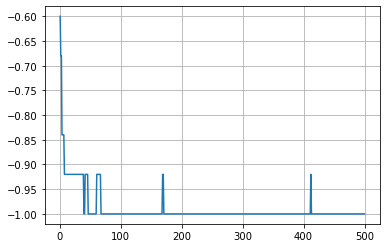

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#load data
z = np.loadtxt("NSL_SIMULATOR/OUTPUT/total_energy_beginning.dat")
z.reshape(-1,4)

x = z[:, 0]
y = z[:, 1]

#plot data
plt.plot(x[:500], y[:500])
plt.grid(True)
plt.show()

Vediamo dunque che un numero di circa 200 passi è sufficente per raggiungere l'equilibrio. Eseguiti i 200 passi, possiamo cominciare la nostra simulazione: per prima cosa stampiamo alcuni valori dell'energia interna al variare di $T \in [0.5, 2.5]$, ottenuti usando l'algoritmo di metropolis e di Gibbs: (per le simulazioni si sono usati 20 blocchi, di lunghezza 50000 (dunque $10^6$ passi))

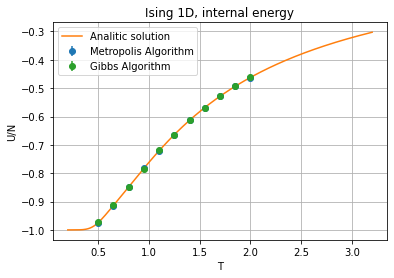

 metropolis chi^2=8.047482717518871
 Gibbs chi^2=17.203428498702113


In [13]:
#load data
z = np.loadtxt("NSL_SIMULATOR/OUTPUT/tenergy_T_dependence.dat")
z.reshape(-1,3)

x = z[:, 0]
y = z[:, 1]
err = z[:,2]

z1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/tenergy_T_dependence_Gibbs.dat")
z1.reshape(-1,3)

x1 = z1[:, 0]
y1 = z1[:, 1]
err1 = z1[:,2]

#analitical solution 
points=301
T = np.linspace(0.2,3.2,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#plot results 

#metropolis
plt.errorbar(x, y, yerr =err, marker='o', linestyle ='None', label = 'Metropolis Algorithm')
plt.grid(True)

#analitical solution
plt.plot(T, e, label= 'Analitic solution')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')

#Gibbs
plt.errorbar(x1, y1, yerr =err1, marker='o', linestyle ='None', label = 'Gibbs Algorithm')
plt.grid(True)
plt.legend()
plt.show()



#compute chi^2
#metropolis
chi=0
for i in range (x.size):
    chi +=  ((y[i]- e[int((x[i]-0.2)*100)])/err[i])*((y[i]- e[int((x[i]-0.2)*100)])/err[i]) 
print(f" metropolis chi^2={chi}")

#Gibbs
chi=0
for i in range (x1.size):
    chi +=  ((y1[i]- e[int((x1[i]-0.2)*100)])/err1[i])*((y1[i]- e[int((x1[i]-0.2)*100)])/err1[i]) 
print(f" Gibbs chi^2={chi}")

Il calore specifico a volume costante: 

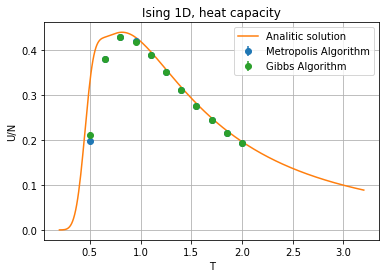

In [14]:
#load data
z = np.loadtxt("NSL_SIMULATOR/OUTPUT/cv_T_dependence.dat")
z.reshape(-1,3)

x = z[:, 0]
y = z[:, 1]
err = z[:,2]

z1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/cv_T_dependence_Gibbs.dat")
z1.reshape(-1,3)

x1 = z1[:, 0]
y1 = z1[:, 1]
err1 = z1[:,2]

#analitical solution
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#plot results 

#metropolis
plt.errorbar(x, y, yerr =err, marker='o', linestyle ='None', label = 'Metropolis Algorithm')
plt.grid(True)

#analitical solution
plt.plot(T, heat, label= 'Analitic solution')
plt.title('Ising 1D, heat capacity')
plt.xlabel('T')
plt.ylabel('U/N')

#Gibbs
plt.errorbar(x1, y1, yerr =err1, marker='o', linestyle ='None', label = 'Gibbs Algorithm')
plt.grid(True)
plt.legend()
plt.show()

e infine la magnetizzazione e la suscettibilità: 

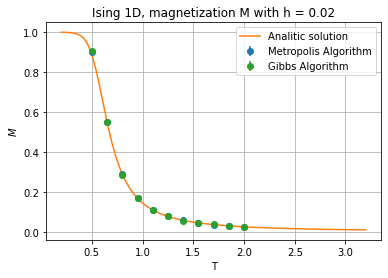

 metropolis chi^2=5.733343692989663
 Gibbs chi^2=14.23349877111456


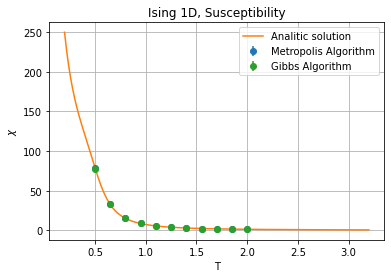

 metropolis chi^2=16.692415275872946
 Gibbs chi^2=8.82594313723929


In [15]:
#load data
z = np.loadtxt("NSL_SIMULATOR/OUTPUT/magnet_T_dependence.dat")
z.reshape(-1,3)

x = z[:, 0]
y = z[:, 1]
err = z[:,2]

z1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/magnet_T_dependence_Gibbs.dat")
z1.reshape(-1,3)

x1 = z1[:, 0]
y1 = z1[:, 1]
err1 = z1[:,2]


#analitical solution
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



#plot results 

#metropolis
plt.errorbar(x, y, yerr =err, marker='o', linestyle ='None', label = 'Metropolis Algorithm')
plt.grid(True)

#analitical solution
plt.plot(T, M, label= 'Analitic solution')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')

#Gibbs
plt.errorbar(x1, y1, yerr =err1, marker='o', linestyle ='None', label = 'Gibbs Algorithm')
plt.grid(True)
plt.legend()
plt.show()

#compute chi^2
#metropolis
chi=0
for i in range (x.size):
    chi +=  ((y[i]- M[int((x[i]-0.2)*100)])/err[i])*((y[i]- M[int((x[i]-0.2)*100)])/err[i]) 
print(f" metropolis chi^2={chi}")

#Gibbs
chi=0
for i in range (x1.size):
    chi +=  ((y1[i]- M[int((x1[i]-0.2)*100)])/err1[i])*((y1[i]- M[int((x1[i]-0.2)*100)])/err1[i]) 
print(f" Gibbs chi^2={chi}")

#load data
z = np.loadtxt("NSL_SIMULATOR/OUTPUT/chi_T_dependence.dat")
z.reshape(-1,3)

x = z[:, 0]
y = z[:, 1]
err = z[:,2]

z1 = np.loadtxt("NSL_SIMULATOR/OUTPUT/chi_T_dependence_Gibbs.dat")
z1.reshape(-1,3)

x1 = z1[:, 0]
y1 = z1[:, 1]
err1 = z1[:,2]

#analitical solution
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


#plot results 

#metropolis
plt.errorbar(x, y, yerr =err, marker='o', linestyle ='None', label = 'Metropolis Algorithm')
plt.grid(True)

#analitical solution
plt.plot(T, X, label = 'Analitic solution')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')

#Gibbs
plt.errorbar(x1, y1, yerr =err1, marker='o', linestyle ='None', label = 'Gibbs Algorithm')
plt.grid(True)
plt.legend()
plt.show()


#compute chi^2
#metropolis
chi=0
for i in range (x.size):
    chi +=  ((y[i]- X[int((x[i]-0.2)*100)])/err[i])*((y[i]- X[int((x[i]-0.2)*100)])/err[i]) 
print(f" metropolis chi^2={chi}")

#Gibbs
chi=0
for i in range (x1.size):
    chi +=  ((y1[i]- X[int((x1[i]-0.2)*100)])/err1[i])*((y1[i]- X[int((x1[i]-0.2)*100)])/err1[i]) 
print(f" Gibbs chi^2={chi}")

Ad eccezzione del $C_v$ a basse temperature, i risultati ottenuti con i due diversi algoritmi sono compatibili, e sono compatibili con la soluzione analitica (in tutti i casi vale $\chi^2 \approx N=11$)

Per tutte le simulazioni si sono usati $N_{blocks}=50$,  da $1 \cdot 10^4$ passi